In [1]:
import random
import pennylane as qml
from pennylane import numpy as np
from myutils import *
from matplotlib import pyplot as plt

#Magic Command, so changes in myutils module are reloaded
%load_ext autoreload
%autoreload 1
%aimport myutils

In [2]:
# Setting seeds for reproducible results
np.random.seed(1337)
n_trainingsamples = 100
n_testingsamples = 1000

# Loading the data

In [27]:
data=  Datasets.get_preprocessed_datasets("Autoencoder_small")["Autoencoder_small"]["3,5"]

#scale data 0, 2*np
x_train = Preprocessing.minmax_scaler(data["x_train"] , min = 0,max = 2 * np.pi)
x_test = Preprocessing.minmax_scaler(data["x_test"], min = 0,max = 2 * np.pi)

y_train_quantum = Preprocessing.convertlabel_to_quantumstates(data["y_train_binary"])
y_test_quantum = Preprocessing.convertlabel_to_quantumstates(data["y_test_binary"])

In [28]:
x_train_subset, y_train_quantum_subset = Preprocessing.select_nExamples(x_train, y_train_quantum, n=n_trainingsamples)
x_test_subset, y_test_quantum_subset = Preprocessing.select_nExamples(x_test, y_test_quantum, n=n_testingsamples)

In [29]:
%%time
np.random.seed(1337)
qcircuit = QuatumCircuit()
hist,params = qcircuit.train(x_train=x_train_subset,
y_train=y_train_quantum_subset, 
x_test=x_test_subset,
y_test=y_test_quantum_subset,
epochs=10,verbose=1)

epoch 0: train_cost:116.220 train_acc:0.540 test_cost:1005.908  test_acc:0.527
epoch 1: train_cost:86.932 train_acc:0.550 test_cost:930.208  test_acc:0.549
epoch 2: train_cost:79.980 train_acc:0.670 test_cost:925.524  test_acc:0.568
epoch 3: train_cost:78.852 train_acc:0.680 test_cost:913.060  test_acc:0.566
epoch 4: train_cost:77.020 train_acc:0.680 test_cost:884.232  test_acc:0.587
epoch 5: train_cost:74.000 train_acc:0.660 test_cost:847.920  test_acc:0.607
epoch 6: train_cost:72.304 train_acc:0.650 test_cost:829.672  test_acc:0.618
epoch 7: train_cost:72.500 train_acc:0.700 test_cost:822.036  test_acc:0.619
epoch 8: train_cost:71.500 train_acc:0.680 test_cost:806.196  test_acc:0.639
epoch 9: train_cost:70.872 train_acc:0.690 test_cost:795.144  test_acc:0.635
CPU times: user 3min 37s, sys: 1.38 s, total: 3min 38s
Wall time: 3min 38s


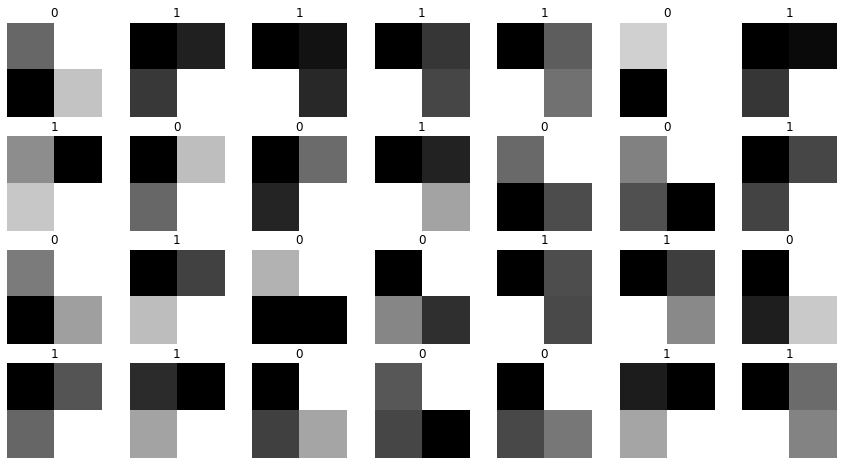

In [60]:
Helpers.plot_grid(data["x_train"],data["y_train"],rows=4,cols=7)

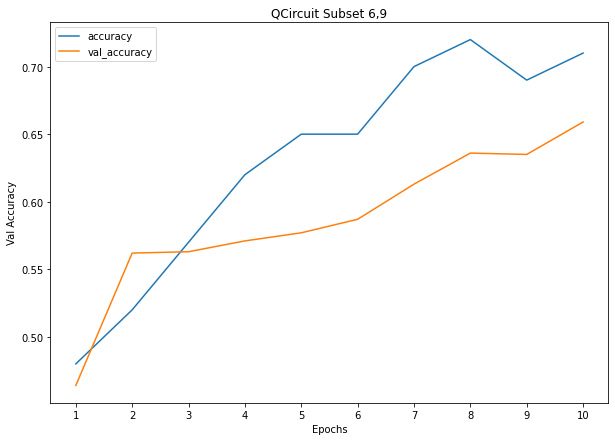

In [9]:
plt.figure(figsize=(10,7))
plt.plot(np.arange(1,11),hist["accuracy"],label="accuracy")
plt.plot(np.arange(1,11),hist["val_accuracy"],label="val_accuracy")
plt.legend()
plt.xticks(np.arange(1,11))
plt.xlabel("Epochs")
plt.ylabel("Val Accuracy")
plt.title("QCircuit Subset 6,9") 
plt.show()


In [60]:
correct = 0
validation_data = np.delete(data["x_test"],test_indices,axis=0)
validation_labels = np.delete(data["y_test_binary_quantum"],test_indices,axis=0)

for i in range(len(validation_data)):
    prediction = qcircuit.predict(validation_data[i])
    
    if prediction == validation_labels[i].tolist():
        correct+=1

print("accuracy: {:.4f} auf {} Validation-Daten".format(correct/len(data["x_test"]), len(validation_data)))

accuracy: 0.4407 auf 940 Validation-Daten
